# Image compression via QR factorization with pivot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg

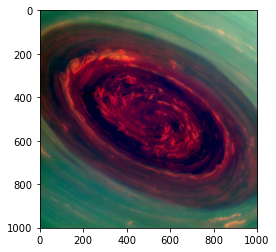

In [2]:
Imm = mpimg.imread('SatStorm.jpg')
plt.figure()
plt.imshow(Imm) 

In [3]:
print('Image size ', Imm.shape)

Image size  (1001, 1001, 3)


In [4]:
#Y = 0.2125 R + 0.7154 G + 0.0721 B 

Imm_gray = 0.2125*Imm[:,:,0] + 0.7154*Imm[:,:,1] + 0.0721*Imm[:,:,2]

print('Gray image ', Imm_gray.shape)

Gray image  (1001, 1001)


Text(0.5, 1.0, 'Original image')

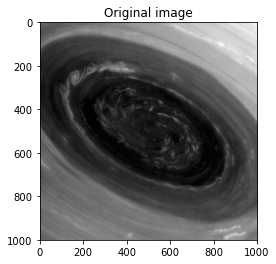

In [5]:
plt.figure()
plt.imshow(Imm_gray, cmap = plt.cm.gray)
plt.title('Original image')

# Low rank approximation via partial pivoting QR factorization

$Theorem$ 

For every matrix $A\in \mathbb{C}^{m\times n}$ there exist a unitary matrix $Q$ and a upper 'trapezoidal' matrix $R$ such that 

$$
A = QR.
$$

If $A$ is a square matrix ($m=n$), then $R$ is a upper triangular matrix and $Q$ can be an orthogonal matrix. 

$Proposition$

Given a matrix $A$ with rank $r$. Then, in exact arithmetic, the $QR$ factorization with partial pivot is given by 

$$
AP = Q \left(\begin{array}{cc}
R_{11} & R_{12}\\
0 & 0\\
\end{array}\right)\,, \quad R_{11} \mbox{ matrix } r\times r
$$

and the diagonal elements of $R_{11}$ are not all equal to zero ($R$ is not singular).

$\mathbf{N.B.}$ : The diagonal elements of  $R_{11}$ are not decreasing:
$$
|r_{11}|\geq |r_{22}|\geq \ldots
$$

When we apply the pivoting to the QR factorization, we construct a ''rank-revealing'' algorithm. Hence, beside improving the numerical stability, we can find the effective rank of the original matrix. 

In [6]:
from scipy import linalg

In [7]:
[Q,R,P]=linalg.qr(Imm_gray,pivoting=True) # Imm_gray*P = Q*R

$\mathbf{N.B.}$ the output $P$ is an array which contains the indices of the permuted columns of the original matrix ``Imm_gray``. In order to apply the formula 

$$
Imm\_gray\, P = QR
$$
we need to write 

``Imm_gray[:,P] = Q*R``

Let us compute an approximation of the original image stored in ``Imm_gray`` by using only $k$ columns of $Q$ e $k$ rows of $R$. The number $k$ is chosen according to the level of accuracy we would like to reach:

1) Extract the modulus of the diagonal element of  $R$ and scale them with respect to their maximum, 

2) Store the tolerance values $\varepsilon_1, \varepsilon_2, \varepsilon_3$,

3) Choose $k$ as the number of diagonal elements of $R$ bigger than the different tolerances.

In [8]:
R_diag = np.diag(R) # Diagonal element of R

R_diag = abs(R_diag)/abs(np.max(R_diag)) # Diagonal elements scaled wrt their maximum

tol = np.array([5e-1, 5e-2, 5e-3]) # array of tolerances

In [9]:
k = np.zeros([1,len(tol)])

for i in range(len(tol)):
    k[0,i] = int(np.count_nonzero(R_diag>tol[i]))
k = k.astype(int)    
print(' array of k ', k)

 array of k  [[ 14 369 922]]


Approximation with k=14 (1001, 1001)


Text(0.5, 1.0, 'qr_14')

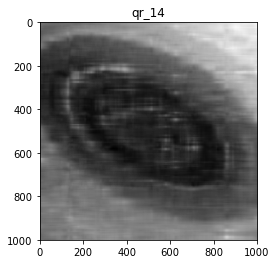

In [10]:
temp = np.dot(Q[:,0:k[0,0]], R[0:k[0,0],:])

Perm = np.identity(len(R_diag))
Perm = Perm[:,P]

qr_app = np.dot(temp,Perm.T)

A_qr_14 = np.reshape(qr_app,[1001,1001])
print('Approximation with k=14', qr_app.shape)
plt.figure()
plt.imshow(A_qr_14, cmap = plt.cm.gray)
plt.title('qr_14')

Approximation with k=369 (1001, 1001)


Text(0.5, 1.0, 'qr_369')

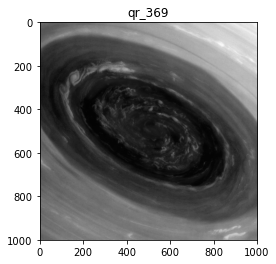

In [12]:
temp1 = np.dot(Q[:,0:k[0,1]], R[0:k[0,1],:])
qr_app1 = np.dot(temp1,Perm.T)

A_qr_369 = np.reshape(qr_app1,[1001,1001])
print('Approximation with k=369', qr_app1.shape)
plt.figure()
plt.imshow(A_qr_369, cmap = plt.cm.gray)
plt.title('qr_369')

Approximation with k=922 (1001, 1001)


Text(0.5, 1.0, 'qr_922')

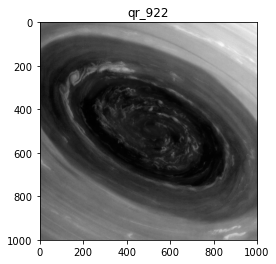

In [13]:
temp2 = np.dot(Q[:,0:k[0,2]], R[0:k[0,2],:])
qr_app2 = np.dot(temp2,Perm.T)

A_qr_922 = np.reshape(qr_app2,[1001,1001])
print('Approximation with k=922', qr_app2.shape)
plt.figure()
plt.imshow(A_qr_922, cmap = plt.cm.gray)
plt.title('qr_922')

Let us compute the "cosine-similarity" between the original image and the reconstructed images

In [15]:
m,n = Imm_gray.shape
costheta_14 = np.zeros([1,n])
for i in range(n):
    col =Imm_gray[:,i] 
    costheta_14[0,:] = np.dot(col,A_qr_14[:,i])/(np.linalg.norm(col)*np.linalg.norm(A_qr_14[:,i]))

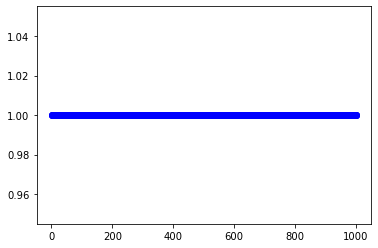

In [21]:
plt.plot(np.linspace(1,n,n), costheta_14[0,:],'ob-')

In [18]:
costheta_369 = np.zeros([1,n])
for i in range(n):
    col =Imm_gray[:,i] 
    costheta_369[0,:] = np.dot(col,A_qr_369[:,i])/(np.linalg.norm(col)*np.linalg.norm(A_qr_369[:,i]))

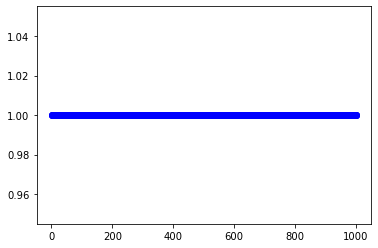

In [19]:
plt.plot(np.linspace(1,n,n), costheta_369[0,:],'ob-')